___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

#### *ii. Load Dataset*

In [55]:
df = pd.read_csv("treetypes.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [56]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [96]:
len(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'])

10

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [59]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

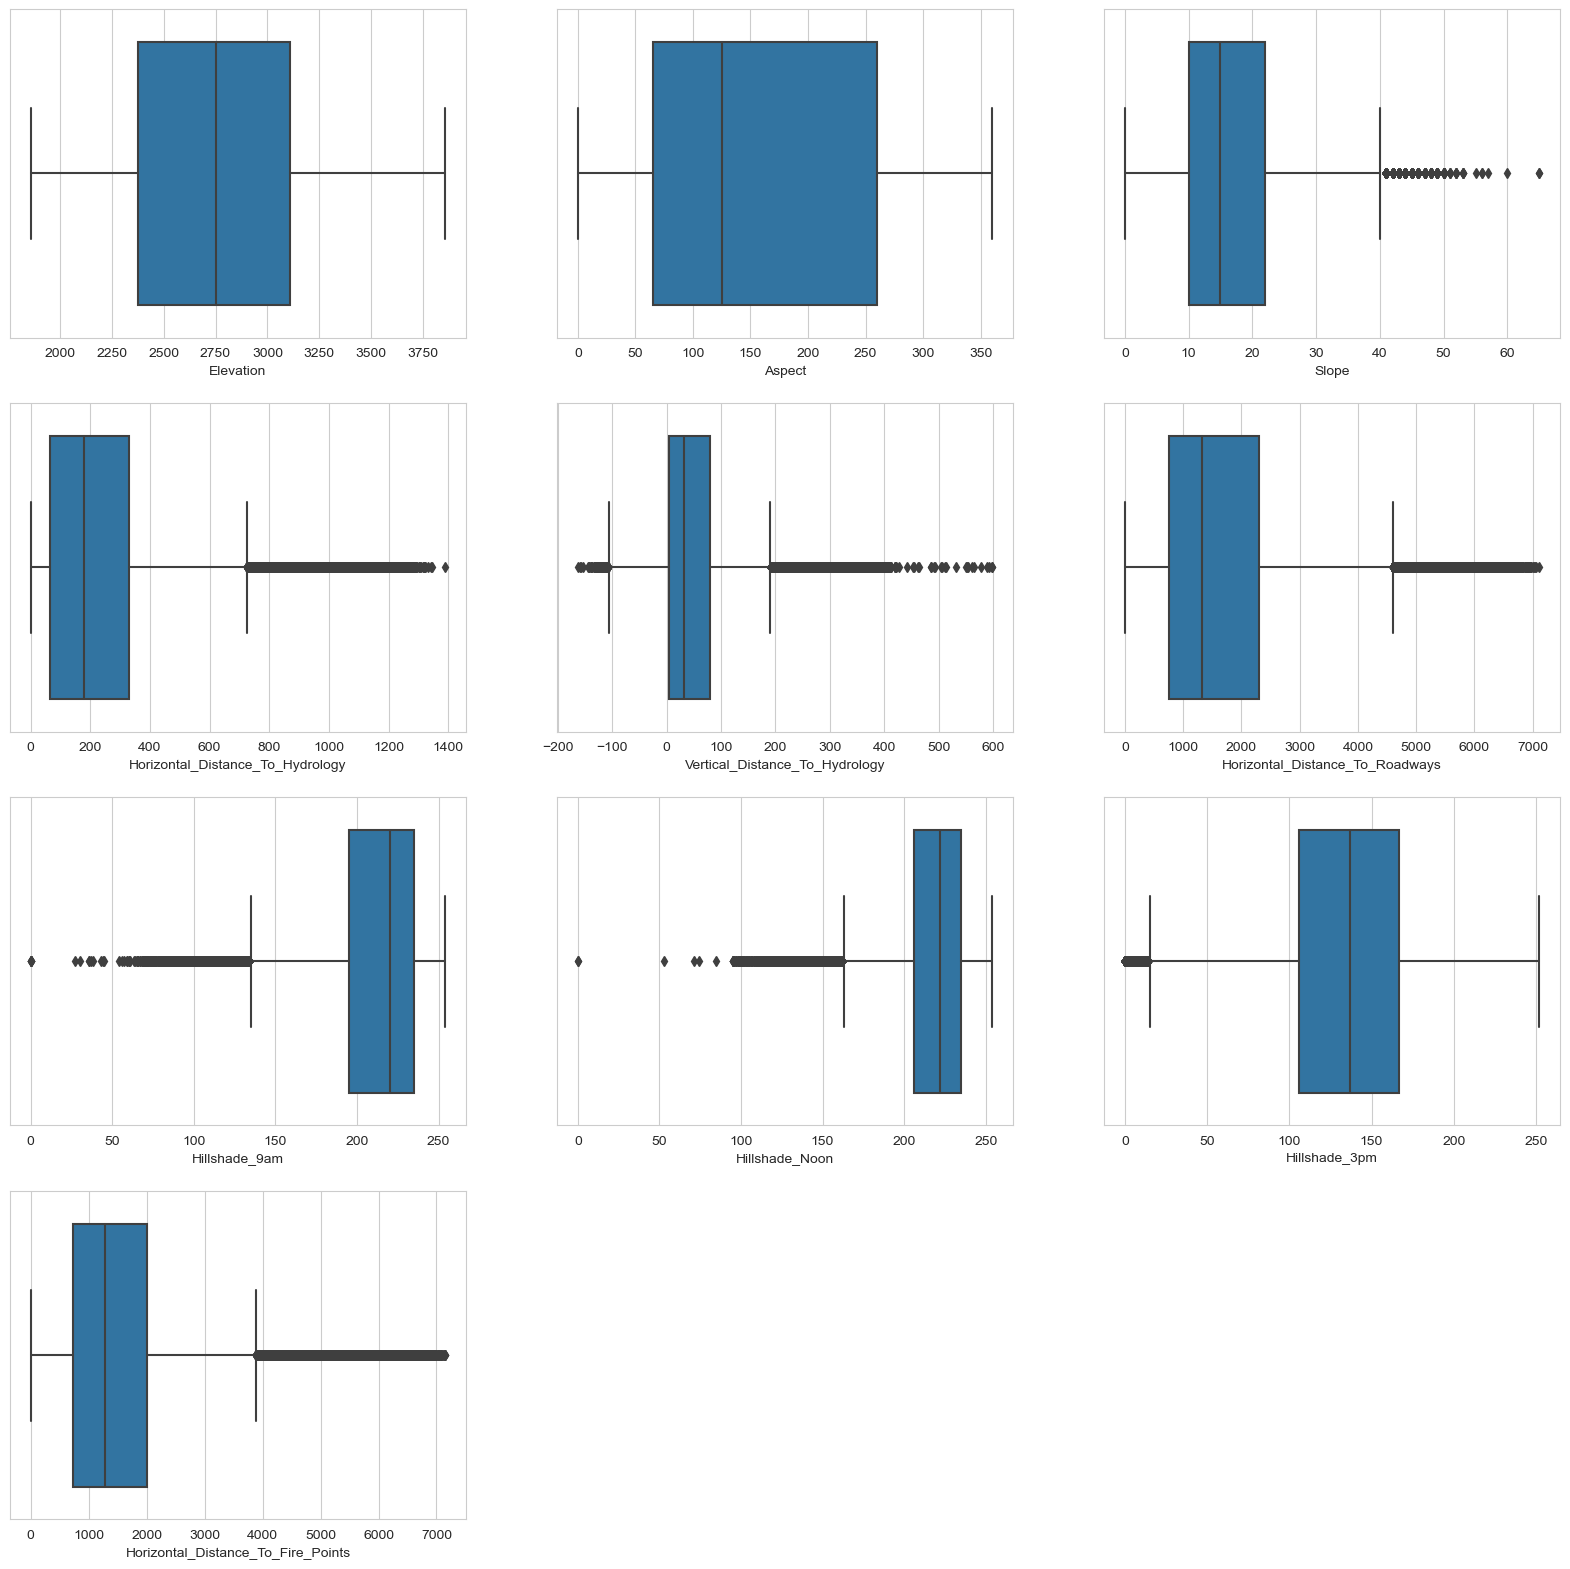

In [60]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data=df, whis=1.5)

### Deal with Outliers

#### *ii. Drop Outliers*

In [61]:
def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

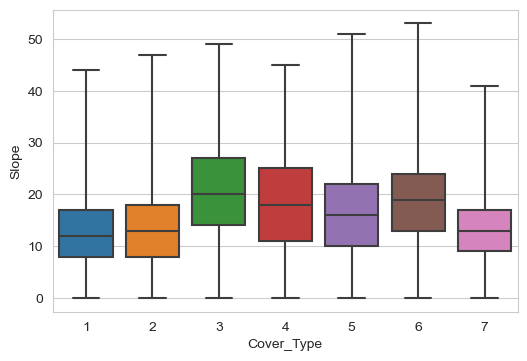

In [62]:
remove_outliers(df, "Slope", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

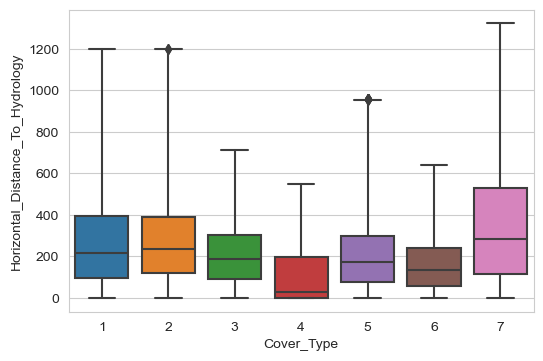

In [63]:
remove_outliers(df, "Horizontal_Distance_To_Hydrology", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

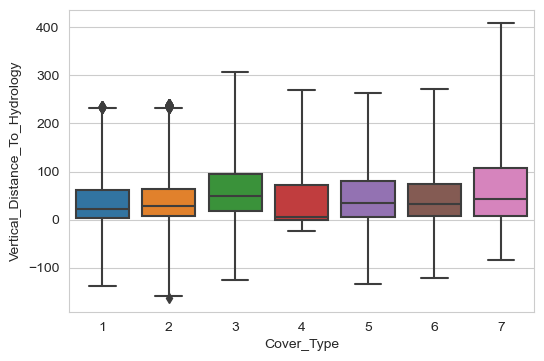

In [64]:
remove_outliers(df, "Vertical_Distance_To_Hydrology", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Roadways'>

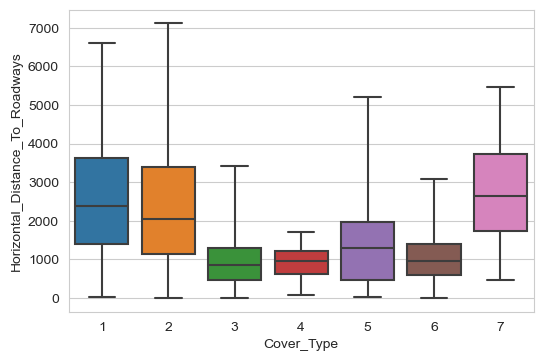

In [65]:
remove_outliers(df, "Horizontal_Distance_To_Roadways", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

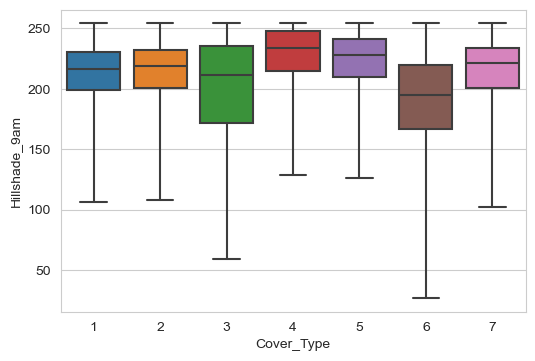

In [66]:
remove_outliers(df, "Hillshade_9am", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

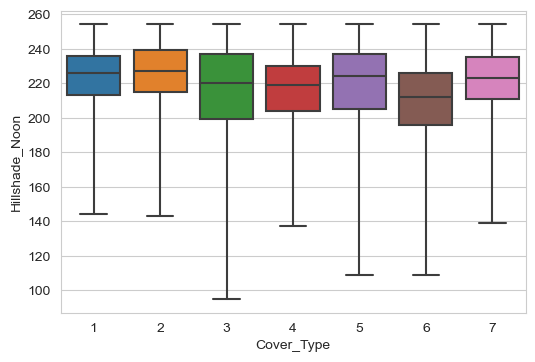

In [67]:
remove_outliers(df, "Hillshade_Noon", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_3pm'>

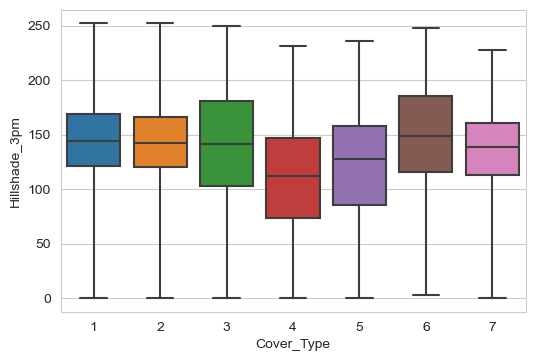

In [68]:
remove_outliers(df, "Hillshade_3pm", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

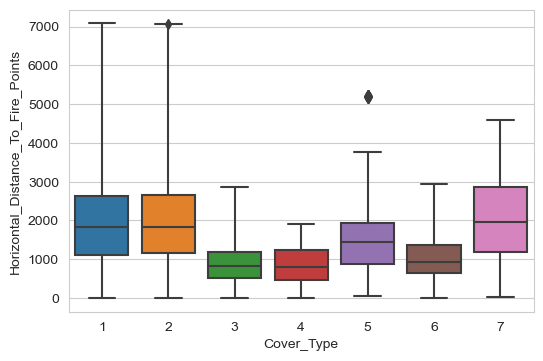

In [69]:
remove_outliers(df, "Horizontal_Distance_To_Fire_Points", whis=3)

In [70]:
df.isnull().sum().sum()

2822

In [71]:
df.dropna(inplace=True)

### Now, let's take a closer look at correlation of continuous columns.

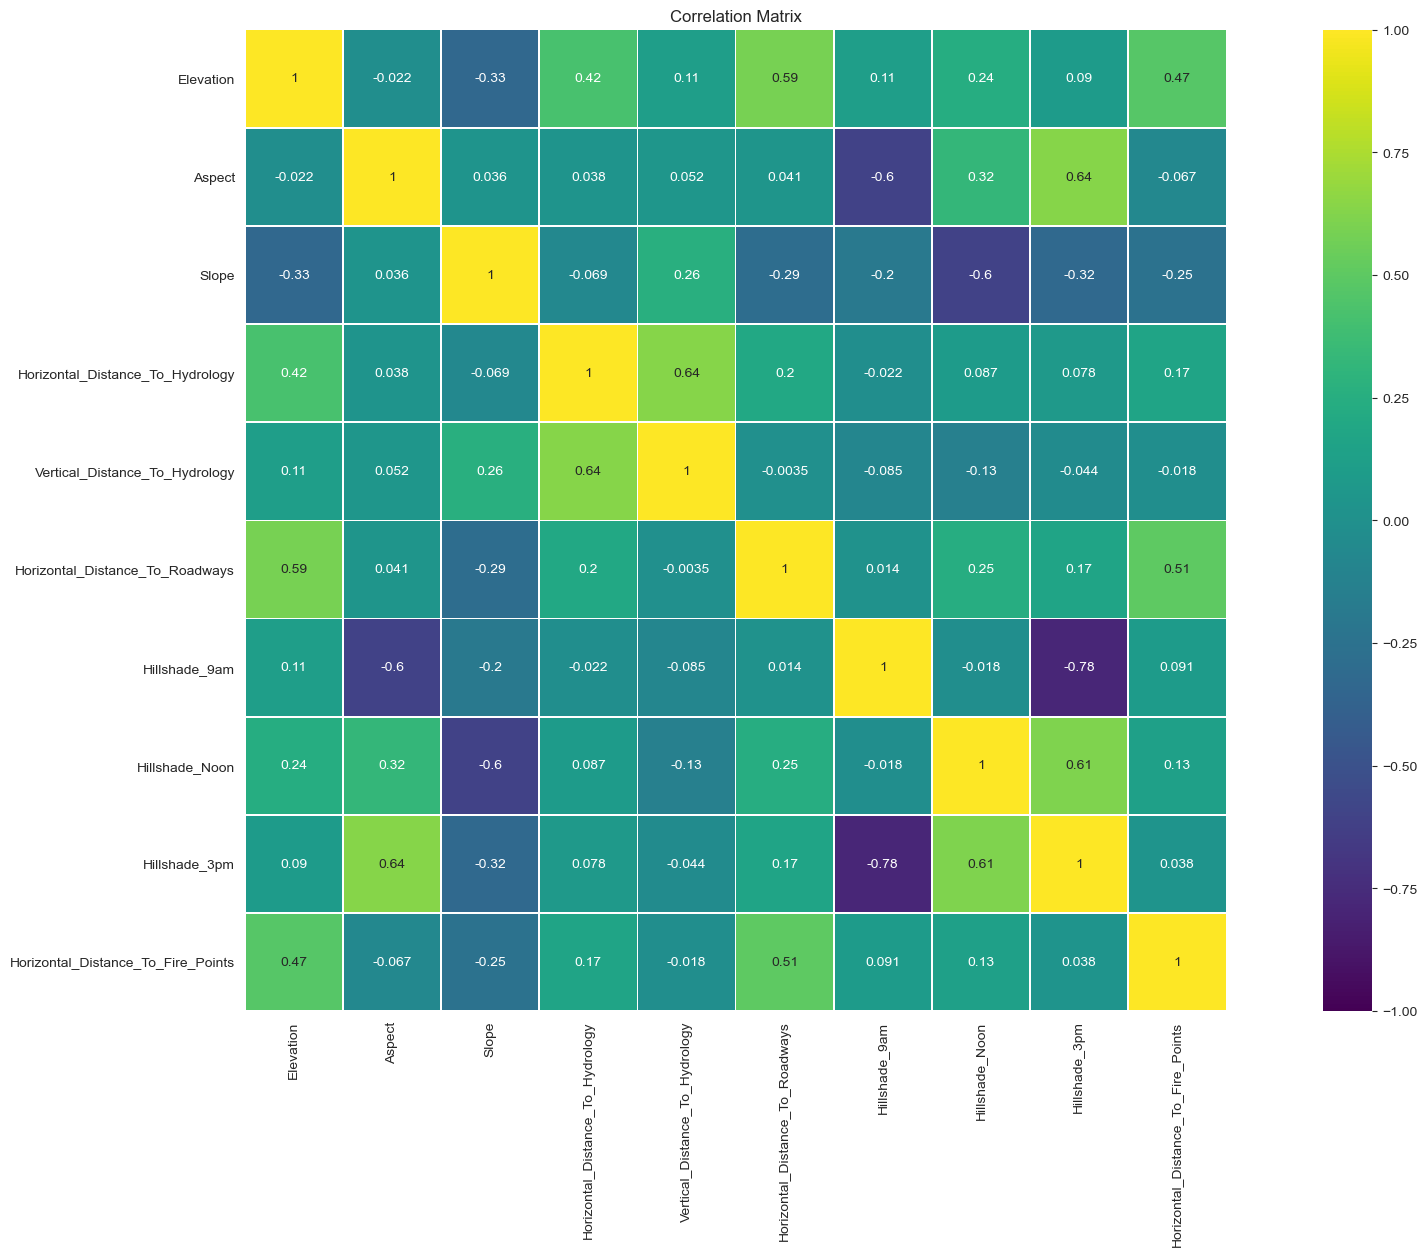

In [72]:
corr_matrix = df[df.columns[:10]].corr()
plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [73]:
df["Hypotenuse_Horizontal_Vertical_Hydrology"] = (df["Horizontal_Distance_To_Hydrology"]**2 + df["Vertical_Distance_To_Hydrology"]**2)**0.5

In [74]:
df["Avg_Horizontal_Hydrology_Roadway"] = (df["Horizontal_Distance_To_Hydrology"] + df["Horizontal_Distance_To_Roadways"])/2

In [75]:
df["Avg_Vertical_Hydrology_Elevation"] = (df["Vertical_Distance_To_Hydrology"] + df["Elevation"])/2

In [76]:
df.drop(columns=["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1, inplace=True)

In [77]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
       'Cover_Type', 'Hypotenu

In [78]:
df.shape

(247359, 56)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [83]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [85]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [105]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [106]:
from sklearn.svm import SVC, LinearSVC

In [107]:
modelSVC = LinearSVC(class_weight = "balanced",random_state=101)

In [108]:
modelSVC.fit(X_train_scaled, y_train)

LinearSVC(class_weight='balanced', random_state=101)

In [109]:
y_pred = modelSVC.predict(X_test_scaled)

SVC_acc = accuracy_score(y_test, y_pred)
SVC_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(modelSVC, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6877 1675    6    0  636  109 1296]
 [2604 5315  241    7 1833  485   76]
 [   0   59 5374 1567  677 2940    0]
 [   0    0  529 9681    0  449    0]
 [ 309 1398  838    0 7298  585    0]
 [   1  365 1754 1222 1165 6198    0]
 [1088    5   38    0   53    0 9455]]
              precision    recall  f1-score   support

           1       0.63      0.65      0.64     10599
           2       0.60      0.50      0.55     10561
           3       0.61      0.51      0.55     10617
           4       0.78      0.91      0.84     10659
           5       0.63      0.70      0.66     10428
           6       0.58      0.58      0.58     10705
           7       0.87      0.89      0.88     10639

    accuracy                           0.68     74208
   macro avg       0.67      0.68      0.67     74208
weighted avg       0.67      0.68      0.67     74208


Train_Set
[[16023  3829    27     0  1476   245  3131]
 [ 6055 12151   554    14  4570  1116   182]
 [    0    74 12704  3526 

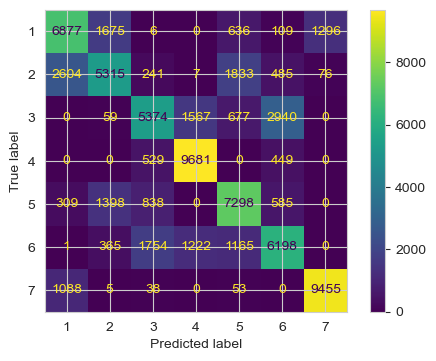

In [110]:
plot_confusion_matrix(modelSVC,X_test_scaled,y_test);

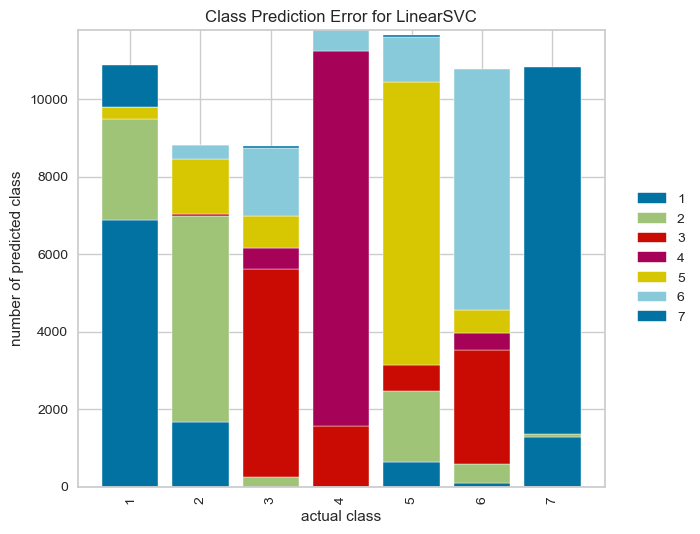

In [111]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(modelSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
tree_model = DecisionTreeClassifier(random_state=101)
tree_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=101)

In [114]:
y_pred = tree_model.predict(X_test)

In [115]:
tree_acc = accuracy_score(y_test, y_pred)
tree_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(tree_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9089  1222     8     0    49     5   226]
 [ 1328  8726   122     0   241   118    26]
 [    9    86  9946   107    45   424     0]
 [    0     0    47 10559     0    53     0]
 [   25   115    16     0 10252    18     2]
 [    3    82   367    61    18 10174     0]
 [  118    17     1     0     0     0 10503]]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     10599
           2       0.85      0.83      0.84     10561
           3       0.95      0.94      0.94     10617
           4       0.98      0.99      0.99     10659
           5       0.97      0.98      0.97     10428
           6       0.94      0.95      0.95     10705
           7       0.98      0.99      0.98     10639

    accuracy                           0.93     74208
   macro avg       0.93      0.93      0.93     74208
weighted avg       0.93      0.93      0.93     74208


Train_Set
[[24731     0     0     0     0     0     0]
 [    0 24642     0   

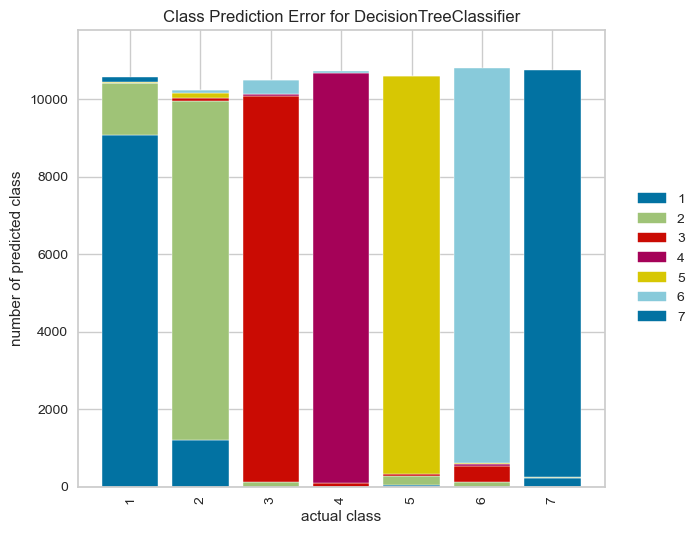

In [116]:
visualizer = ClassPredictionError(tree_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=38)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=38)

In [125]:
y_pred = rf_model.predict(X_test)

RF_acc = accuracy_score(y_test, y_pred)
RF_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9576   833     7     0    27    10   146]
 [  737  9385   109     1   185   131    13]
 [    0    13 10311    71    11   211     0]
 [    0     0    12 10644     0     3     0]
 [    0     9     9     0 10405     5     0]
 [    0     3   108    43     8 10543     0]
 [   21     1     0     0     0     0 10617]]
              precision    recall  f1-score   support

           1       0.93      0.90      0.91     10599
           2       0.92      0.89      0.90     10561
           3       0.98      0.97      0.97     10617
           4       0.99      1.00      0.99     10659
           5       0.98      1.00      0.99     10428
           6       0.97      0.98      0.98     10705
           7       0.99      1.00      0.99     10639

    accuracy                           0.96     74208
   macro avg       0.96      0.96      0.96     74208
weighted avg       0.96      0.96      0.96     74208


Train_Set
[[24731     0     0     0     0     0     0]
 [    0 24642     0   

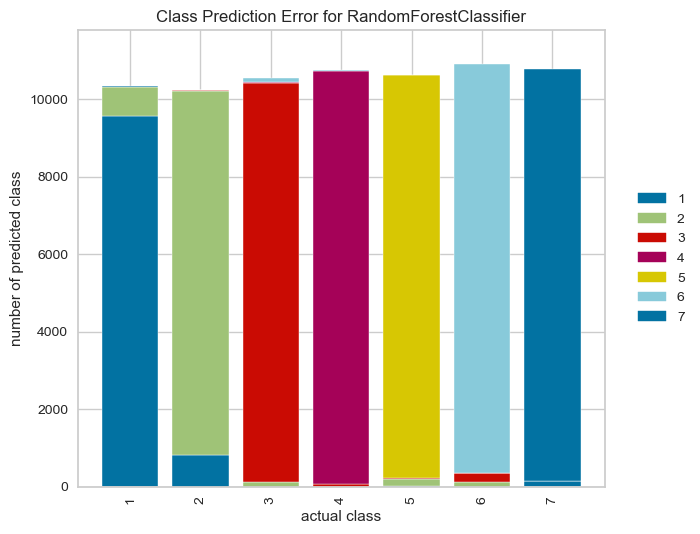

In [126]:
visualizer = ClassPredictionError(rf_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [134]:
from xgboost import XGBClassifier

In [135]:
xgb = XGBClassifier(random_state=101 ,eval_metric='mlogloss').fit(X_train, y_train)

In [136]:
y_pred = rf_model.predict(X_test)

XGB_acc = accuracy_score(y_test, y_pred)
XGB_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[ 8962  1232     7     0   101     9   288]
 [ 1476  8333   138     1   421   171    21]
 [    1    25  9599   107    62   823     0]
 [    0     0    14 10627     0    18     0]
 [    2    47    29     0 10322    28     0]
 [    0    17   387    57    39 10205     0]
 [   63     1     0     0     0     0 10575]]
              precision    recall  f1-score   support

           1       0.85      0.85      0.85     10599
           2       0.86      0.79      0.82     10561
           3       0.94      0.90      0.92     10617
           4       0.98      1.00      0.99     10659
           5       0.94      0.99      0.97     10428
           6       0.91      0.95      0.93     10705
           7       0.97      0.99      0.98     10639

    accuracy                           0.92     74208
   macro avg       0.92      0.92      0.92     74208
weighted avg       0.92      0.92      0.92     74208


Train_Set
[[21867  2178     5     0   217    14   450]
 [ 2854 20426   242   

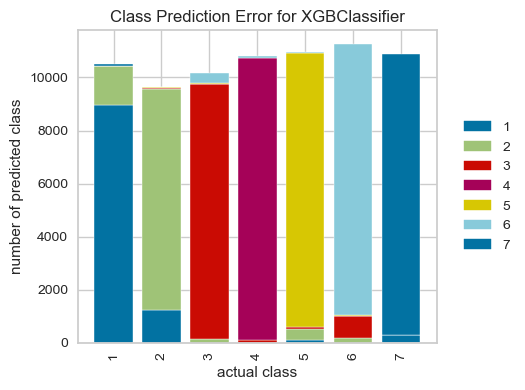

In [137]:
visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

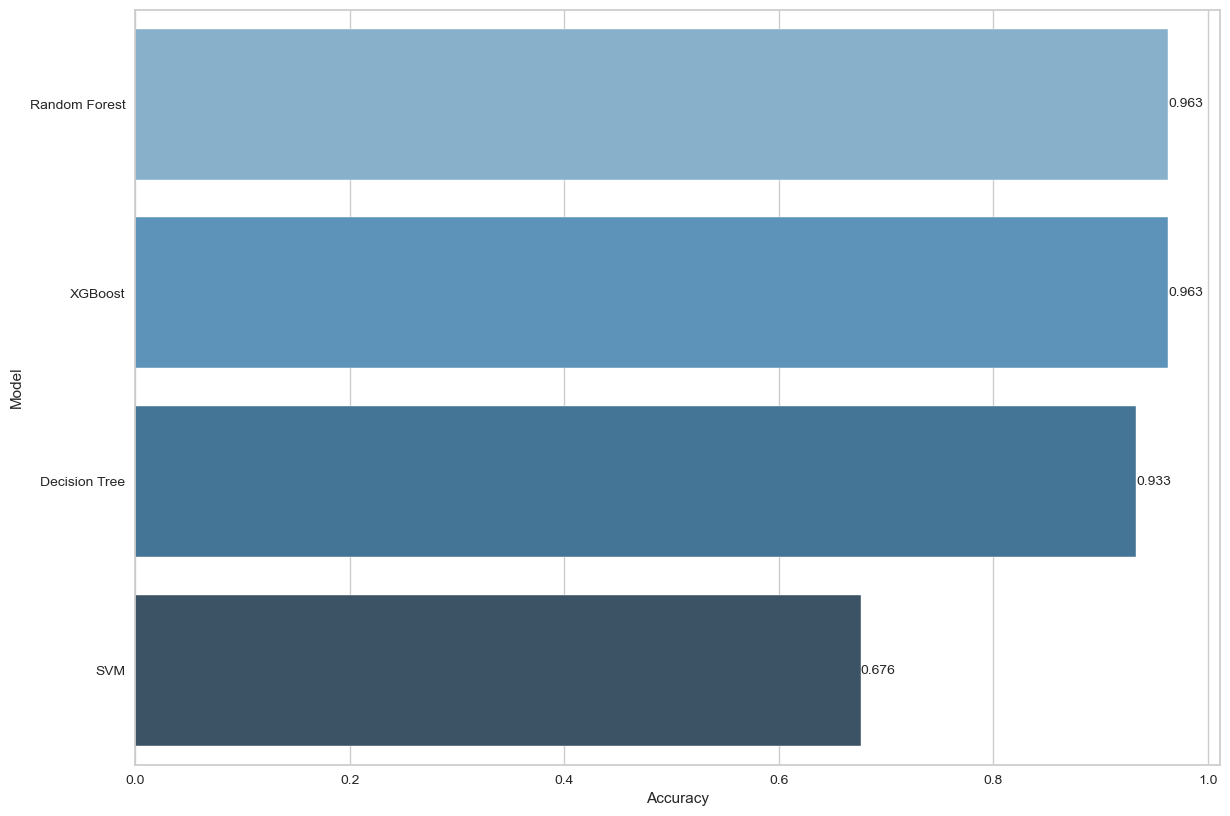

In [145]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest", "XGBoost"],
                        "Accuracy": [SVC_acc, tree_acc, RF_acc, XGB_acc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

    
plt.figure(figsize=(14,10))

compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

# F1 Score Comparison

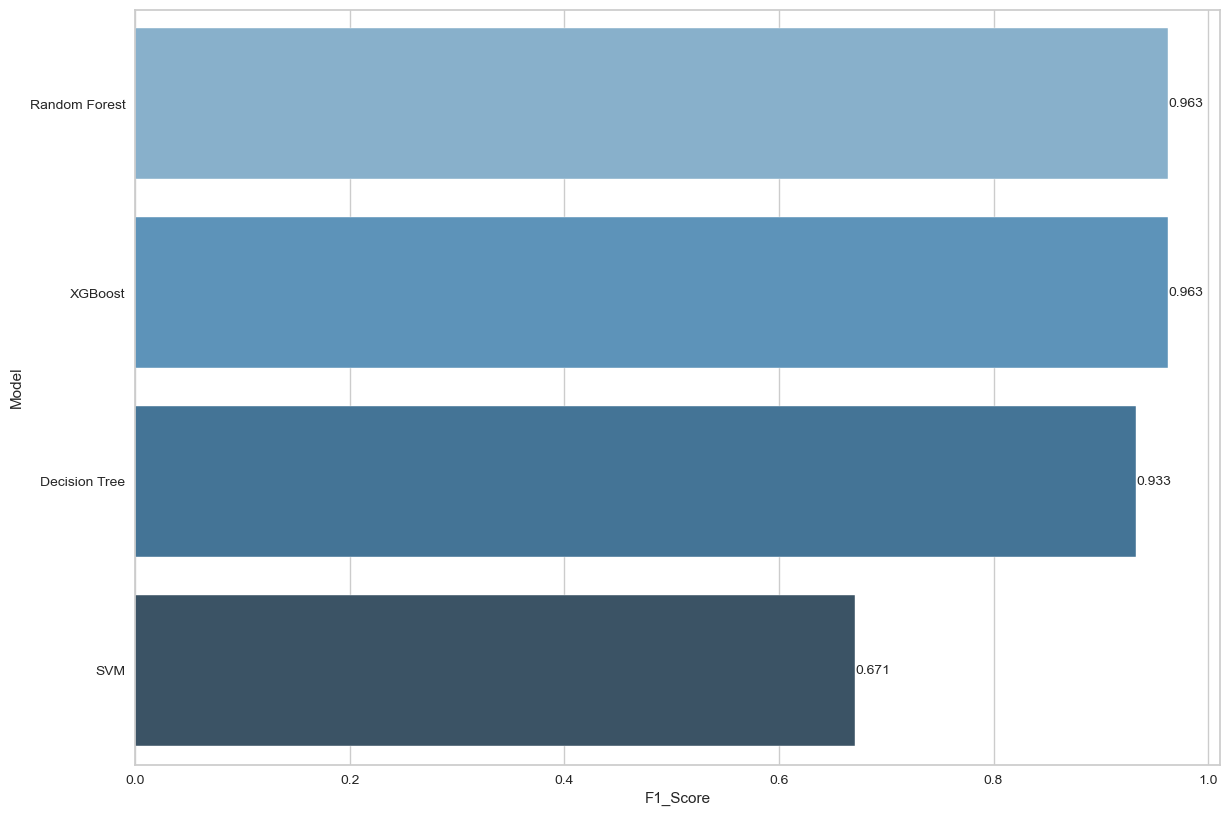

In [144]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest", "XGBoost"],
                        "F1_Score": [SVC_f1, tree_f1, RF_f1, XGB_f1]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___